In [1]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd


2024-06-17 14:49:42.150225: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load data

cell_counts = pd.read_csv('./cell_counts.csv')

print(cell_counts)

  orig.ident  Macrophage  Dendritic_cell  T_cell  Unknown_inf  Neutrophil  \
0     UUOIH1         810             161     316           98         123   
1     UUOIH2        1141             262     199          123          61   
2     UUOIH3        1498             184     236          104          78   
3     UUOVH1        1368             615     187          148         108   
4     UUOVH2        1113             566     152          215         141   
5     UUOVH3        1554             691     258          194          93   

   Myeload  B_cell  
0       65      96  
1       66      34  
2       95      35  
3      123      67  
4      110     125  
5      157      93  


In [3]:
data_mouse = dat.from_pandas(cell_counts, covariate_columns=["orig.ident"])

# Extract condition from mouse name and add it as an extra column to the covariates
data_mouse.obs["Condition"] = data_mouse.obs["orig.ident"].str[:-1]
print(data_mouse.X)
print(data_mouse.obs)

[[ 810  161  316   98  123   65   96]
 [1141  262  199  123   61   66   34]
 [1498  184  236  104   78   95   35]
 [1368  615  187  148  108  123   67]
 [1113  566  152  215  141  110  125]
 [1554  691  258  194   93  157   93]]
  orig.ident Condition
0     UUOIH1     UUOIH
1     UUOIH2     UUOIH
2     UUOIH3     UUOIH
3     UUOVH1     UUOVH
4     UUOVH2     UUOVH
5     UUOVH3     UUOVH


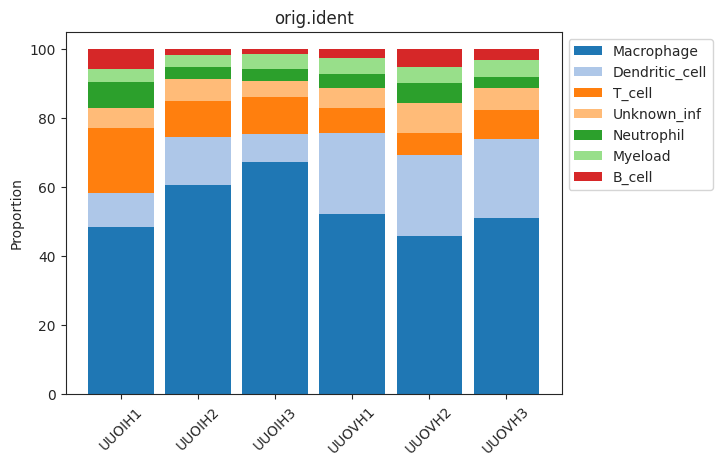

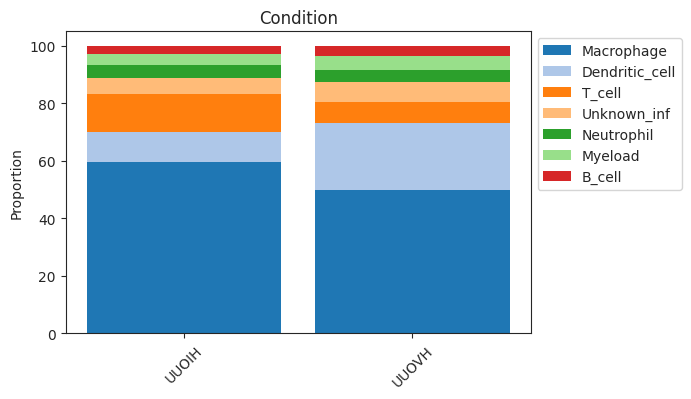

In [4]:
# Stacked barplot for each sample
viz.stacked_barplot(data_mouse, feature_name="orig.ident")
plt.show()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_mouse, feature_name="Condition")
plt.show()

<Figure size 720x7200 with 0 Axes>

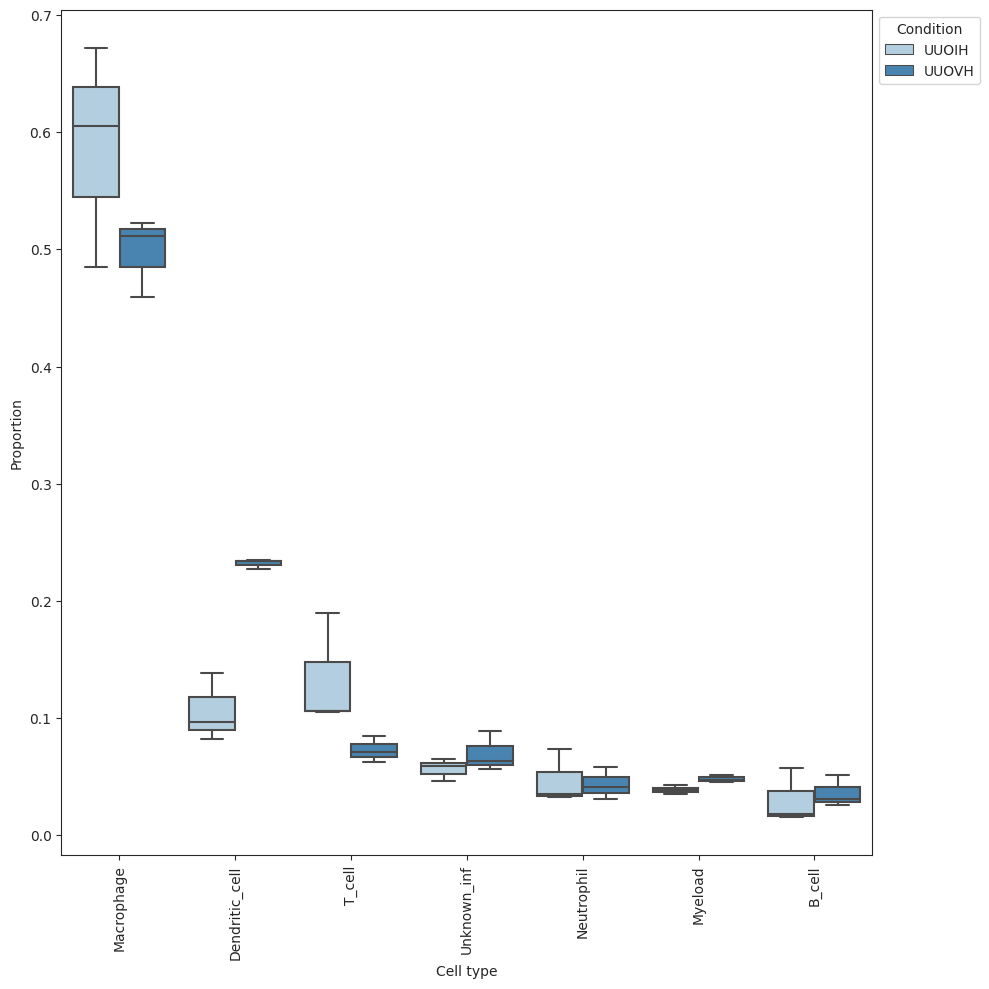

In [5]:
# Grouped boxplots. No facets, relative abundance, no dots.
plt.figure(figsize=(10,100))

viz.boxplots(
    data_mouse,
    feature_name="Condition",
    plot_facets=False,
    y_scale="relative",
    add_dots=False,
    figsize=(10,10)
)
plt.savefig('./figure_inf.pdf')
plt.show()




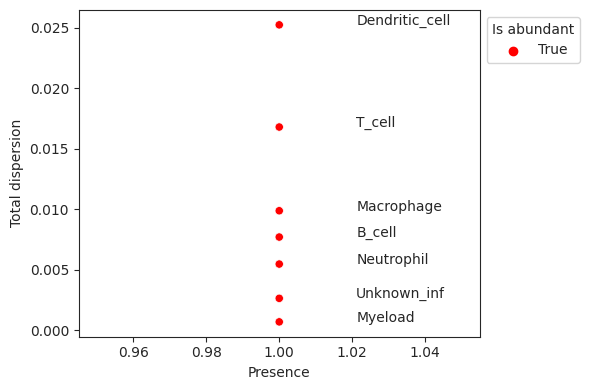

In [6]:
viz.rel_abundance_dispersion_plot(
    data=data_mouse,
    abundant_threshold=0.9
)
plt.show()

In [9]:
# Set UUOVH as "default" category

model_salm_switch_cond = mod.CompositionalAnalysis(data_mouse, formula="C(Condition, Treatment('UUOVH'))", reference_cell_type="automatic")
switch_results = model_salm_switch_cond.sample_hmc()
switch_results.summary() 

Automatic reference selection! Reference cell type set to Myeload


100%|█████████████████████████████████████| 20000/20000 [03:27<00:00, 96.48it/s]


MCMC sampling finished. (262.647 sec)
Acceptance rate: 64.1%
Compositional Analysis summary:

Data: 6 samples, 7 cell types
Reference index: 5
Formula: C(Condition, Treatment('UUOVH'))

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
Macrophage                4.330      1167.498630
Dendritic_cell            3.535       527.220473
T_cell                    2.525       192.023703
Unknown_inf               2.271       148.951212
Neutrophil                1.876       100.345458
Myeload                   1.876       100.345458
B_cell                    1.573        74.115065


Effects:
                                                          Final Parameter  \
Covariate                                 Cell Type                         
C(Condition, Treatment('UUOVH'))[T.UUOIH] Macrophage             0.000000   
                                          Dendritic_cell        -0.820757   
                                          

In [13]:
switch_results.set_fdr(est_fdr=0.3)
switch_results.summary()

Compositional Analysis summary:

Data: 6 samples, 7 cell types
Reference index: 5
Formula: C(Condition, Treatment('UUOVH'))

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
Macrophage                4.330      1167.498630
Dendritic_cell            3.535       527.220473
T_cell                    2.525       192.023703
Unknown_inf               2.271       148.951212
Neutrophil                1.876       100.345458
Myeload                   1.876       100.345458
B_cell                    1.573        74.115065


Effects:
                                                          Final Parameter  \
Covariate                                 Cell Type                         
C(Condition, Treatment('UUOVH'))[T.UUOIH] Macrophage             0.000000   
                                          Dendritic_cell        -0.820757   
                                          T_cell                 0.414499   
                          